In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [2]:
#Read CSV
pace2017 = pd.read_csv("2017_in_seconds.csv")
pace2016 = pd.read_csv("2016_in_seconds.csv")
pace2015 = pd.read_csv("2015_in_seconds.csv")

In [3]:
#Creating DataFrame contains needed info (Plot No.2)
#Count Rows for grouping Top/Average/Bottom Runners
time17_df = pace2017[["5k","10k","15k","20k","25k","30k","35k","40k"]]
time16_df = pace2016[["5k","10k","15k","20k","25k","30k","35k","40k"]]
time15_df = pace2015[["5k","10k","15k","20k","25k","30k","35k","40k"]]

total_runner_17 = time17_df["5k"].count()
total_runner_16 = time16_df["5k"].count()
total_runner_15 = time15_df["5k"].count()

In [4]:
#Covertion and Cleaning of pace data under new DataFrame
time17_df["5K"] = time17_df["5k"]
time17_df["10K"] = time17_df["10k"]-time17_df["5k"]
time17_df["15K"] = time17_df["15k"]-time17_df["10k"]
time17_df["20K"] = time17_df["20k"]-time17_df["15k"]
time17_df["25K"] = time17_df["25k"]-time17_df["20k"]
time17_df["30K"] = time17_df["30k"]-time17_df["25k"]
time17_df["35K"] = time17_df["35k"]-time17_df["30k"]
time17_df["40K"] = time17_df["40k"]-time17_df["35k"]
time17_df = time17_df[["5K","10K","15K","20K","25K","30K","35K","40K"]]

time16_df["5K"] = time16_df["5k"]
time16_df["10K"] = time16_df["10k"]-time16_df["5k"]
time16_df["15K"] = time16_df["15k"]-time16_df["10k"]
time16_df["20K"] = time16_df["20k"]-time16_df["15k"]
time16_df["25K"] = time16_df["25k"]-time16_df["20k"]
time16_df["30K"] = time16_df["30k"]-time16_df["25k"]
time16_df["35K"] = time16_df["35k"]-time16_df["30k"]
time16_df["40K"] = time16_df["40k"]-time16_df["35k"]
time16_df = time16_df[["5K","10K","15K","20K","25K","30K","35K","40K"]]


time15_df["5K"] = time15_df["5k"]
time15_df["10K"] = time15_df["10k"]-time15_df["5k"]
time15_df["15K"] = time15_df["15k"]-time15_df["10k"]
time15_df["20K"] = time15_df["20k"]-time15_df["15k"]
time15_df["25K"] = time15_df["25k"]-time15_df["20k"]
time15_df["30K"] = time15_df["30k"]-time15_df["25k"]
time15_df["35K"] = time15_df["35k"]-time15_df["30k"]
time15_df["40K"] = time15_df["40k"]-time15_df["35k"]
time15_df = time15_df[["5K","10K","15K","20K","25K","30K","35K","40K"]]

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [5]:
#Filtering runners and more cleaning: Top/Bottom/Average

top_10_17 = time17_df.head(int(total_runner_17*0.0001))
top_10_16 = time16_df.head(int(total_runner_16*0.0001))
top_10_15 = time15_df.head(int(total_runner_15*0.0001))
top_average_17 = top_10_17.mean(axis=0)
top_average_16 = top_10_16.mean(axis=0)
top_average_15 = top_10_15.mean(axis=0)
combine_top = (top_average_17 + top_average_16 + top_average_15)/3

bottom_10_17 = time17_df[-(int(total_runner_17*0.0001)) :]
bottom_10_16 = time16_df[-(int(total_runner_16*0.0001)) :]
bottom_10_15 = time15_df[-(int(total_runner_15*0.0001)) :]
bottom_average_17 = bottom_10_17.mean(axis=0)
bottom_average_16 = bottom_10_16.mean(axis=0)
bottom_average_15 = bottom_10_15.mean(axis=0)
combine_bottom = (bottom_average_17 + bottom_average_16 + bottom_average_15)/3

average_pace_2017 = time17_df.mean(axis=0)
average_pace_2016 = time16_df.mean(axis=0)
average_pace_2015 = time15_df.mean(axis=0)
combine_average = (average_pace_2015 + average_pace_2016 + average_pace_2017)/3

In [6]:
#Covertion from seconds to m/s
speed_top = 5000 / combine_top
speed_average = 5000 / combine_average
speed_bottom = 5000 / combine_bottom

In [7]:
#Set x-axis
x_axis = ["5K","10K","15K","20K","25K","30K","35K","40K"]

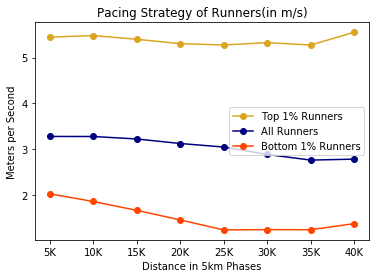

In [8]:
#Line Graph No.2: "Pacing Strategy of Runners", measured by speed in m/s
plt.plot(x_axis, speed_top, marker ='o', color='goldenrod', label="Top 1% Runners")
plt.plot(x_axis, speed_average, marker ='o', color='navy', label="All Runners")
plt.plot(x_axis, speed_bottom, marker ='o', color='orangered', label="Bottom 1% Runners")
plt.legend(loc="best")
plt.title("Pacing Strategy of Runners(in m/s)")
plt.xlabel("Distance in 5km Phases")
plt.ylabel("Meters per Second")
plt.savefig("Images/Pacing Strategy of Runners in ms.png")
plt.show()


In [9]:
#New df(columns) that contains rate of change in meters per second

speed_top["5k"] = 0
speed_top["10k"] = (speed_top["10K"] - speed_top["5K"]) / speed_top["5K"]
speed_top["15k"] = (speed_top["15K"] - speed_top["10K"]) / speed_top["10K"]
speed_top["20k"] = (speed_top["20K"] - speed_top["15K"]) / speed_top["15K"]
speed_top["25k"] = (speed_top["25K"] - speed_top["20K"]) / speed_top["20K"]
speed_top["30k"] = (speed_top["30K"] - speed_top["25K"]) / speed_top["25K"]
speed_top["35k"] = (speed_top["35K"] - speed_top["30K"]) / speed_top["30K"]
speed_top["40k"] = (speed_top["40K"] - speed_top["35K"]) / speed_top["35K"]
rate_top = speed_top [["5k","10k","15k","20k","25k","30k","35k","40k"]]

speed_average["5k"] = 0
speed_average["10k"] = (speed_average["10K"] - speed_average["5K"]) / speed_average["5K"]
speed_average["15k"] = (speed_average["15K"] - speed_average["10K"]) / speed_average["10K"]
speed_average["20k"] = (speed_average["20K"] - speed_average["15K"]) / speed_average["15K"]
speed_average["25k"] = (speed_average["25K"] - speed_average["20K"]) / speed_average["20K"]
speed_average["30k"] = (speed_average["30K"] - speed_average["25K"]) / speed_average["25K"]
speed_average["35k"] = (speed_average["35K"] - speed_average["30K"]) / speed_average["30K"]
speed_average["40k"] = (speed_average["40K"] - speed_average["35K"]) / speed_average["35K"]
rate_average = speed_average[["5k","10k","15k","20k","25k","30k","35k","40k"]]

speed_bottom["5k"] = 0
speed_bottom["10k"] = (speed_bottom["10K"] - speed_bottom["5K"]) / speed_bottom["5K"]
speed_bottom["15k"] = (speed_bottom["15K"] - speed_bottom["10K"]) / speed_bottom["10K"]
speed_bottom["20k"] = (speed_bottom["20K"] - speed_bottom["15K"]) / speed_bottom["15K"]
speed_bottom["25k"] = (speed_bottom["25K"] - speed_bottom["20K"]) / speed_bottom["20K"]
speed_bottom["30k"] = (speed_bottom["30K"] - speed_bottom["25K"]) / speed_bottom["25K"]
speed_bottom["35k"] = (speed_bottom["35K"] - speed_bottom["30K"]) / speed_bottom["30K"]
speed_bottom["40k"] = (speed_bottom["40K"] - speed_bottom["35K"]) / speed_bottom["35K"]
rate_bottom = speed_bottom[["5k","10k","15k","20k","25k","30k","35k","40k"]]

In [10]:
x_axis_3 = ["5K","10K","15K","20K","25K","30K","35K","40K"]

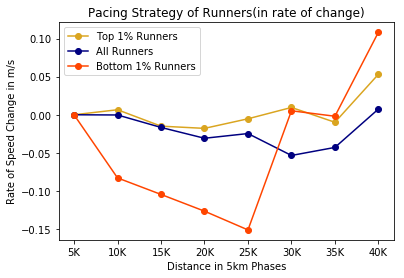

In [11]:
#Line Graph No.3: "Pacing Strategy of Runners", measured by Rate of Speed Change
plt.plot(x_axis_3, rate_top, marker ='o', color='goldenrod', label="Top 1% Runners")
plt.plot(x_axis_3, rate_average, marker ='o', color='navy', label="All Runners")
plt.plot(x_axis_3, rate_bottom, marker ='o', color='orangered', label="Bottom 1% Runners")
plt.legend(loc="best")
plt.title("Pacing Strategy of Runners(in rate of change)")
plt.xlabel("Distance in 5km Phases")
plt.ylabel("Rate of Speed Change in m/s")
plt.savefig("Images/Pacing Strategy of Runnersin rate of change.png")
plt.show()